
Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.
Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.


In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [11]:
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

In [29]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
standart = result.nfev
standart

2793

In [34]:
result = differential_evolution(ackley, bounds, strategy='best1exp', updating='deferred', seed=42)
best1exp_deferred = result.nfev
best1exp_deferred

4983

In [46]:
result = differential_evolution(ackley, bounds,  popsize = 10, seed=42)
popsize_10 = result.nfev
popsize_10

2023

In [47]:
result = differential_evolution(ackley, bounds, tol=1e-5, mutation=(0.3, 1.7), popsize = 10, seed=42)
mutation_03_17 = result.nfev
mutation_03_17

2503

In [48]:
result = differential_evolution(ackley, bounds, tol=1e-5, mutation=(0.3, 1.7), popsize = 10, recombination=0.5, seed=42)
recombination_05 = result.nfev
recombination_05

2543

In [60]:
result = differential_evolution(ackley, bounds, strategy='currenttobest1bin', tol=0.03, mutation=(0.2, 1.7), popsize = 10, recombination=0.7, seed=42)
currenttobest1bin = result.nfev
currenttobest1bin

20083

In [63]:
data = {'Parameter': ['standart', 'best1exp_deferred', 'popsize_10', 'mutation_03_17', 'recombination_05', 'currenttobest1bin'],
        'Number of iterations': [standart, best1exp_deferred, popsize_10, mutation_03_17, recombination_05, currenttobest1bin]}

In [64]:
df = pd.DataFrame(data)

In [65]:
df

,Parameter,Number of iterations
0,standart,2793
1,best1exp_deferred,4983
2,popsize_10,2023
3,mutation_03_17,2503
4,recombination_05,2543
5,currenttobest1bin,20083


<AxesSubplot:title={'center':'the number of iterations of optimization of the function'}, xlabel='Parameter', ylabel='Number of iterations'>

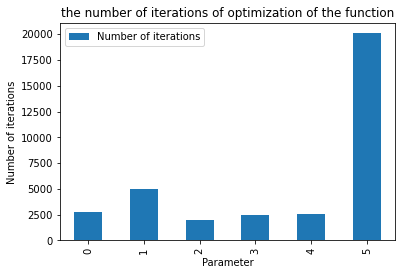

In [66]:
df.plot(kind='bar', 
                                                                  title='the number of iterations of optimization of the function',
                                                                  xlabel='Parameter',
                                                                  ylabel='Number of iterations')